In [17]:
import pandas as pd
# source https://www.kaggle.com/datasets/laotse/credit-risk-dataset
df = pd.read_csv('../data/raw/credit_risk_dataset.csv')

# Description des statistiques de base

In [19]:
shape = df.shape
print(f'Colonnes: {shape[1]}')
print(f'Lignes: {shape[0]}')

Colonnes: 12
Lignes: 32581


In [20]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [21]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Matrice de correlation - Variables quantitatives

                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000  

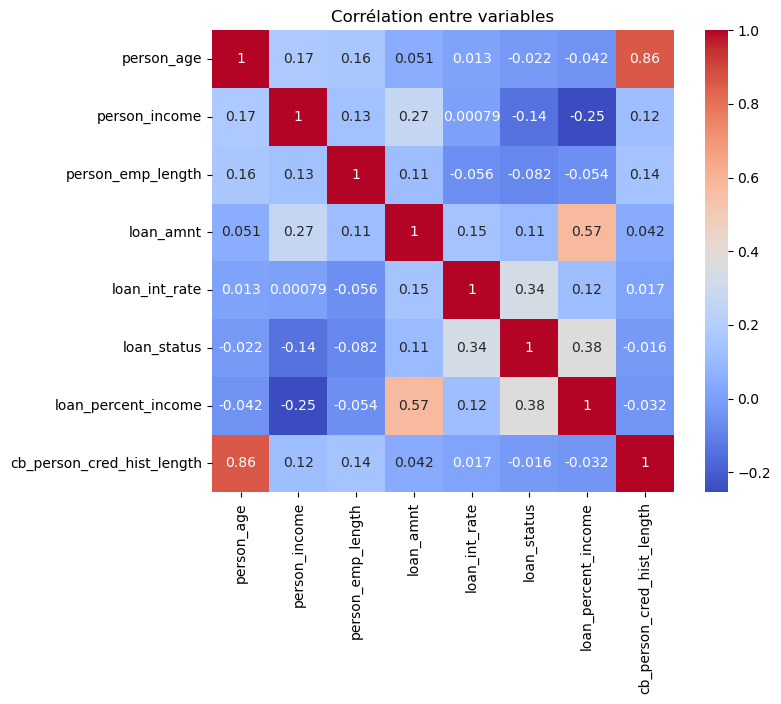

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcule la corrélation
corr = numeric_df.corr()

# Affiche la corrélation
print(corr)

# Crée le heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Corrélation entre variables')
plt.show()

Bien que la variable person_home_ownership soit statistiquement significative (comme l’indiquent les faibles p-valeurs), le coefficient de détermination R² de 0,059 montre que ce modèle explique seulement 5,9 % de la variance dans la variable dépendante loan_status. Cela suggère que la propriété du logement a un faible pouvoir explicatif sur le statut du prêt. Les coefficients montrent que les individus qui possèdent leur logement (OWN) ont un statut de prêt légèrement inférieur par rapport à ceux avec une hypothèque, tandis que ceux qui louent (RENT) ou ont d’autres types de propriété (OTHER) ont des statuts de prêt légèrement plus élevés.

En résumé, même si l’effet est statistiquement significatif, d'autres variables non incluses dans ce modèle jouent probablement un rôle important dans la détermination du statut de prêt.

### Correlation entre loan_status et loan_intent

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('loan_status ~ C(loan_intent)', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(model.summary())

Bien que les différentes catégories d’intention de prêt aient un effet statistiquement significatif sur le statut de prêt, l’effet global est faible (comme l'indique le R-carré de 1,6 %). Cela suggère que d’autres facteurs non inclus dans le modèle influencent fortement le statut de prêt

### Correlation entre loan_status et loan_grade


In [ ]:
model = ols('loan_status ~ C(loan_grade)', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(model.summary())

Les notes de prêt (loan_grade) sont des prédicteurs significatifs du statut de prêt, et l'effet de la note de prêt devient de plus en plus fort à mesure que la note augmente, avec un impact particulièrement important pour les notes D, E, F, et G. Toutefois, avec un R-carré de 17,2 %, cela indique que d'autres facteurs importants influencent également le statut de prêt, et qu'ils ne sont pas capturés par ce modèle.

# Pair Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='loan_status', height=3.5, corner=True)
None

## Valeurs manquantes

In [ ]:
# D'après la commande ci-dessous, nous pouvons voir que 
# les champs person_emp_length et loan_int_rate ont des valeurs manquantes
print(df.info())

In [ ]:
df[df['person_emp_length'].isnull()]

In [ ]:
df[df['loan_int_rate'].isnull()]

## Distribuition 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns :
    sns.displot(df[col])
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

## Boxplot - Valeurs aberrantes
Les graphiques ci-dessous montrent quelques valeurs aberrantes. Par exemple, certains enregistrements ont des valeurs supérieures à 80 ans dans le champ âge

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

col_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(nrows=len(col_numeriques), figsize=(8, 6*len(col_numeriques)))
for i, col in enumerate(col_numeriques):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [ ]:
df[df['person_emp_length'].notna()]
